In [ ]:
# Импортиуем библиотеки
import pandas as pd
import seaborn as sns

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np

!pip install phik -q
import phik

!pip install -U scikit-learn
from sklearn.preprocessing import TargetEncoder
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score
from sklearn.metrics import make_scorer

!pip install calmap
import calmap

!pip install catboost
from catboost import CatBoostRegressor, Pool, cv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 18.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.2 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Открываем файлы

names = ['sales_df_train', 'pr_df', 'st_df']

for n in names:
  try:
    globals()[n] = pd.read_csv(f'{n}.csv')

  except:
    globals()[n] = pd.read_csv(f'/content/drive/MyDrive/{n}.csv')



In [ ]:
sales_df_train.head()

,st_id,pr_sku_id,date,pr_sales_type_id,pr_sales_in_units,pr_promo_sales_in_units,pr_sales_in_rub,pr_promo_sales_in_rub
0,c81e728d9d4c2f636f067f89cc14862c,c7b711619071c92bef604c7ad68380dd,2022-10-20,1,5.0,5.0,825.0,825.0
1,42a0e188f5033bc65bf8d78622277c4e,68f441429e73dbd33b81f95da31576e9,2023-01-29,0,4.0,0.0,196.0,0.0
2,1ecfb463472ec9115b10c292ef8bc986,22988026fe85fde60d8bf777ab6bc3b4,2023-03-02,0,1.0,0.0,78.0,0.0
3,42a0e188f5033bc65bf8d78622277c4e,8e887cf8e64ab8e7173701a979476567,2023-04-05,1,0.0,0.0,69.0,69.0
4,16a5cdae362b8d27a1d8f8c7b78b4330,e6fc24ca846339d204b0b50e9f772484,2023-02-17,0,1.0,0.0,161.0,0.0


In [ ]:
sales_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883015 entries, 0 to 883014
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   st_id                    883015 non-null  object 
 1   pr_sku_id                883015 non-null  object 
 2   date                     883015 non-null  object 
 3   pr_sales_type_id         883015 non-null  int64  
 4   pr_sales_in_units        883015 non-null  float64
 5   pr_promo_sales_in_units  883015 non-null  float64
 6   pr_sales_in_rub          883015 non-null  float64
 7   pr_promo_sales_in_rub    883015 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 53.9+ MB


In [ ]:
pr_df.head()

,pr_sku_id,pr_group_id,pr_cat_id,pr_subcat_id,pr_uom_id
0,fd064933250b0bfe4f926b867b0a5ec8,c74d97b01eae257e44aa9d5bade97baf,1bc0249a6412ef49b07fe6f62e6dc8de,ca34f669ae367c87f0e75dcae0f61ee5,17
1,71c9661741caf40a92a32d1cc8206c04,c74d97b01eae257e44aa9d5bade97baf,c559da2ba967eb820766939a658022c8,e06f5ed77191826c212c30722f2cc5a2,17
2,00b72c2f01a1512cbb1d3f33319bac93,c74d97b01eae257e44aa9d5bade97baf,1bc0249a6412ef49b07fe6f62e6dc8de,d407a3ebb4ab9b0d68b224486f8b8dad,17
3,9bc40cd2fe4f188f402bb41548c5e15c,c74d97b01eae257e44aa9d5bade97baf,1bc0249a6412ef49b07fe6f62e6dc8de,ca34f669ae367c87f0e75dcae0f61ee5,17
4,3a74a370c8eb032acb11ad9119242b8f,c74d97b01eae257e44aa9d5bade97baf,c559da2ba967eb820766939a658022c8,e06f5ed77191826c212c30722f2cc5a2,17


In [ ]:
pr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050 entries, 0 to 2049
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   pr_sku_id     2050 non-null   object
 1   pr_group_id   2050 non-null   object
 2   pr_cat_id     2050 non-null   object
 3   pr_subcat_id  2050 non-null   object
 4   pr_uom_id     2050 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 80.2+ KB


In [ ]:
st_df.head()

,st_id,st_city_id,st_division_code,st_type_format_id,st_type_loc_id,st_type_size_id,st_is_active
0,1aa057313c28fa4a40c5bc084b11d276,1587965fb4d4b5afe8428a4a024feb0d,81b4dd343f5880df806d4c5d4a846c64,4,3,19,0
1,bd470ca955d9497bbcb808e59952fffc,955d864a62659945cc9434898e275deb,e26072c92d8fe0738df44d571d5f5e8b,4,3,19,1
2,6364d3f0f495b6ab9dcf8d3b5c6e0b01,b8b4b727d6f5d1b61fff7be687f7970f,da742b3cfca5388aaf9af28a726a3c30,1,1,12,1
3,1ecfb463472ec9115b10c292ef8bc986,908c9a564a86426585b29f5335b619bc,429a86ff6336c144ddaf6144f52ab52c,2,1,28,1
4,16a5cdae362b8d27a1d8f8c7b78b4330,c1f75cc0f7fe269dd0fd9bd5e24f9586,296bd0cc6e735f9d7488ebc8fbc19130,1,2,8,1


In [ ]:
st_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   st_id              12 non-null     object
 1   st_city_id         12 non-null     object
 2   st_division_code   12 non-null     object
 3   st_type_format_id  12 non-null     int64 
 4   st_type_loc_id     12 non-null     int64 
 5   st_type_size_id    12 non-null     int64 
 6   st_is_active       12 non-null     int64 
dtypes: int64(4), object(3)
memory usage: 800.0+ bytes


In [ ]:
# Проверим данные на полные дубликаты
for n in names:
    print(globals()[n].duplicated().sum())

0
0
0


In [ ]:
temp_df = pd.merge(sales_df_train, pr_df, on='pr_sku_id')
df = pd.merge(temp_df, st_df, on='st_id')
del temp_df

In [ ]:
df.head()

,st_id,pr_sku_id,date,pr_sales_type_id,pr_sales_in_units,pr_promo_sales_in_units,pr_sales_in_rub,pr_promo_sales_in_rub,pr_group_id,pr_cat_id,pr_subcat_id,pr_uom_id,st_city_id,st_division_code,st_type_format_id,st_type_loc_id,st_type_size_id,st_is_active
0,c81e728d9d4c2f636f067f89cc14862c,c7b711619071c92bef604c7ad68380dd,2022-10-20,1,5.0,5.0,825.0,825.0,aab3238922bcc25a6f606eb525ffdc56,28fc2782ea7ef51c1104ccf7b9bea13d,d29b5ce9c2883f0b7e90f79071a2ca82,1,908c9a564a86426585b29f5335b619bc,429a86ff6336c144ddaf6144f52ab52c,1,1,8,1
1,c81e728d9d4c2f636f067f89cc14862c,c7b711619071c92bef604c7ad68380dd,2023-02-02,1,1.0,1.0,107.0,107.0,aab3238922bcc25a6f606eb525ffdc56,28fc2782ea7ef51c1104ccf7b9bea13d,d29b5ce9c2883f0b7e90f79071a2ca82,1,908c9a564a86426585b29f5335b619bc,429a86ff6336c144ddaf6144f52ab52c,1,1,8,1
2,c81e728d9d4c2f636f067f89cc14862c,c7b711619071c92bef604c7ad68380dd,2022-10-09,1,1.0,1.0,167.0,167.0,aab3238922bcc25a6f606eb525ffdc56,28fc2782ea7ef51c1104ccf7b9bea13d,d29b5ce9c2883f0b7e90f79071a2ca82,1,908c9a564a86426585b29f5335b619bc,429a86ff6336c144ddaf6144f52ab52c,1,1,8,1
3,c81e728d9d4c2f636f067f89cc14862c,c7b711619071c92bef604c7ad68380dd,2023-06-22,0,0.0,0.0,79.0,0.0,aab3238922bcc25a6f606eb525ffdc56,28fc2782ea7ef51c1104ccf7b9bea13d,d29b5ce9c2883f0b7e90f79071a2ca82,1,908c9a564a86426585b29f5335b619bc,429a86ff6336c144ddaf6144f52ab52c,1,1,8,1
4,c81e728d9d4c2f636f067f89cc14862c,c7b711619071c92bef604c7ad68380dd,2023-06-30,1,25.0,25.0,3766.0,3766.0,aab3238922bcc25a6f606eb525ffdc56,28fc2782ea7ef51c1104ccf7b9bea13d,d29b5ce9c2883f0b7e90f79071a2ca82,1,908c9a564a86426585b29f5335b619bc,429a86ff6336c144ddaf6144f52ab52c,1,1,8,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 883015 entries, 0 to 883014
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   st_id                    883015 non-null  object 
 1   pr_sku_id                883015 non-null  object 
 2   date                     883015 non-null  object 
 3   pr_sales_type_id         883015 non-null  int64  
 4   pr_sales_in_units        883015 non-null  float64
 5   pr_promo_sales_in_units  883015 non-null  float64
 6   pr_sales_in_rub          883015 non-null  float64
 7   pr_promo_sales_in_rub    883015 non-null  float64
 8   pr_group_id              883015 non-null  object 
 9   pr_cat_id                883015 non-null  object 
 10  pr_subcat_id             883015 non-null  object 
 11  pr_uom_id                883015 non-null  int64  
 12  st_city_id               883015 non-null  object 
 13  st_division_code         883015 non-null  object 
 14  st_t

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
# Проверим расположены ли даты и время в хронологическом ли порядке
df.index.is_monotonic

<ipython-input-15-68b31ea2e934>:2: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  df.index.is_monotonic


True

In [ ]:
len(df['date'].unique())

352

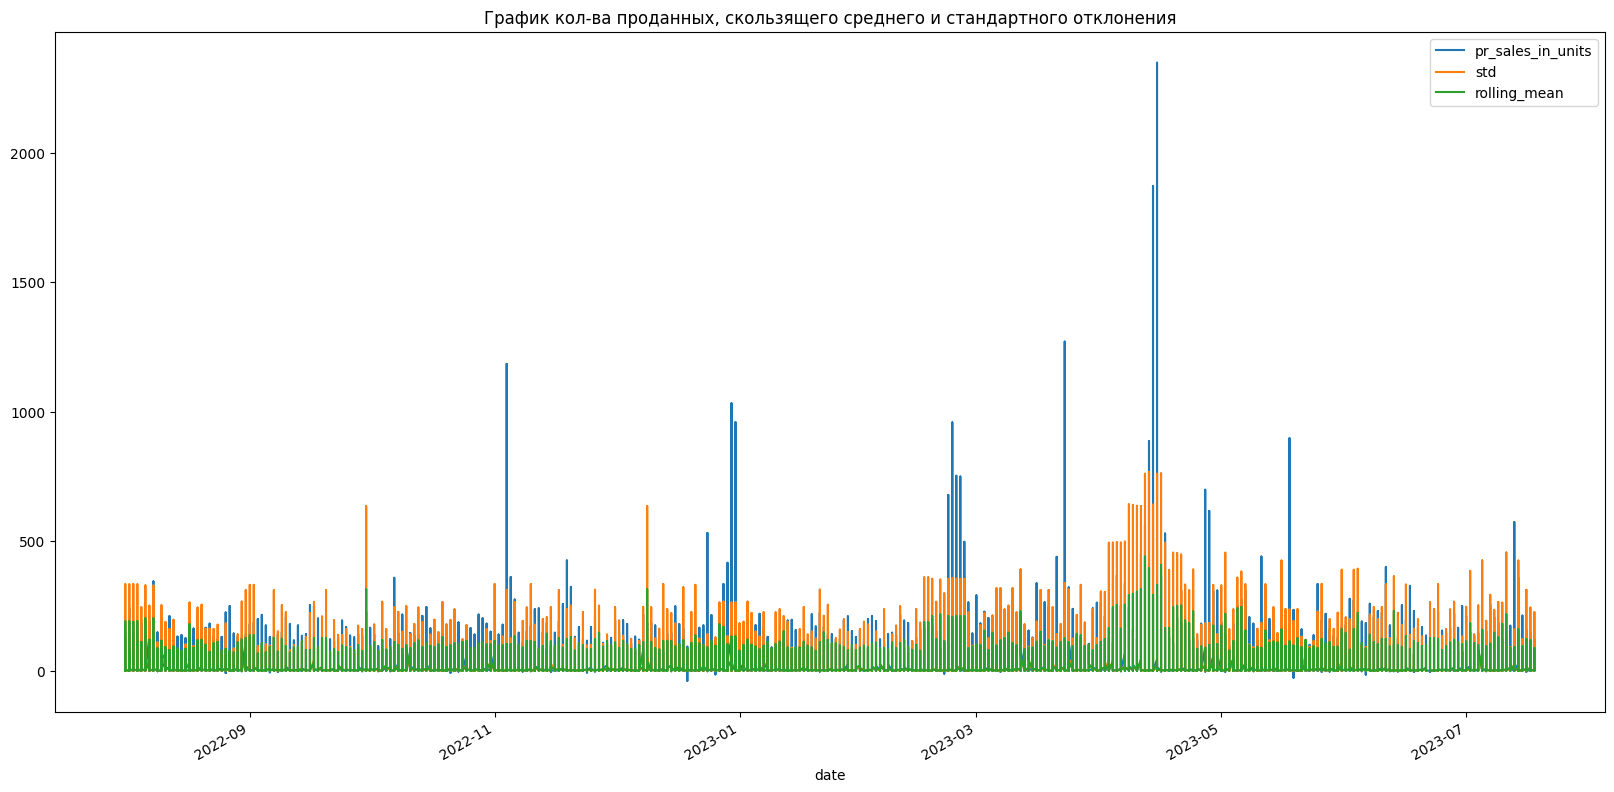

In [ ]:
# Построим график кол-ва проданных, скользящего среднего и стандартного отклонения
df_a = df.copy()

df_a['rolling_mean'] = df_a['pr_sales_in_units'].rolling(14).mean()
df_a['std'] = df_a['pr_sales_in_units'].rolling(14).std()

df_a[['date', 'pr_sales_in_units', 'std', 'rolling_mean']].plot(figsize=(20, 10),
                                             x='date',
                                             title = 'График кол-ва проданных, скользящего среднего и стандартного отклонения');

In [ ]:
# 1. Создание словаря
hash_to_num_dict = {}
num_to_hash_dict = {}

for column in df.columns:
    if df[column].dtype == 'object':  # Проверяем, является ли столбец хэшированным
        unique_values = df[column].unique()
        hash_to_num = {value: num for num, value in enumerate(unique_values)}
        num_to_hash = {num: value for num, value in enumerate(unique_values)}
        hash_to_num_dict[column] = hash_to_num
        num_to_hash_dict[column] = num_to_hash

# 2. Замена хэшей на порядковые номера в df
df_num = df.copy()
for column, hash_to_num in hash_to_num_dict.items():
    df_num[column] = df[column].map(hash_to_num)

In [ ]:
interval_cols = ['pr_sales_in_units',
                 'pr_promo_sales_in_units',
                 'pr_sales_in_rub',
                 'pr_promo_sales_in_rub']

/usr/local/lib/python3.10/dist-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable pr_sku_id is large: 1991. Are you sure this is not an interval variable? Analysis for pairs of variables including pr_sku_id can be slow.
  warnings.warn(


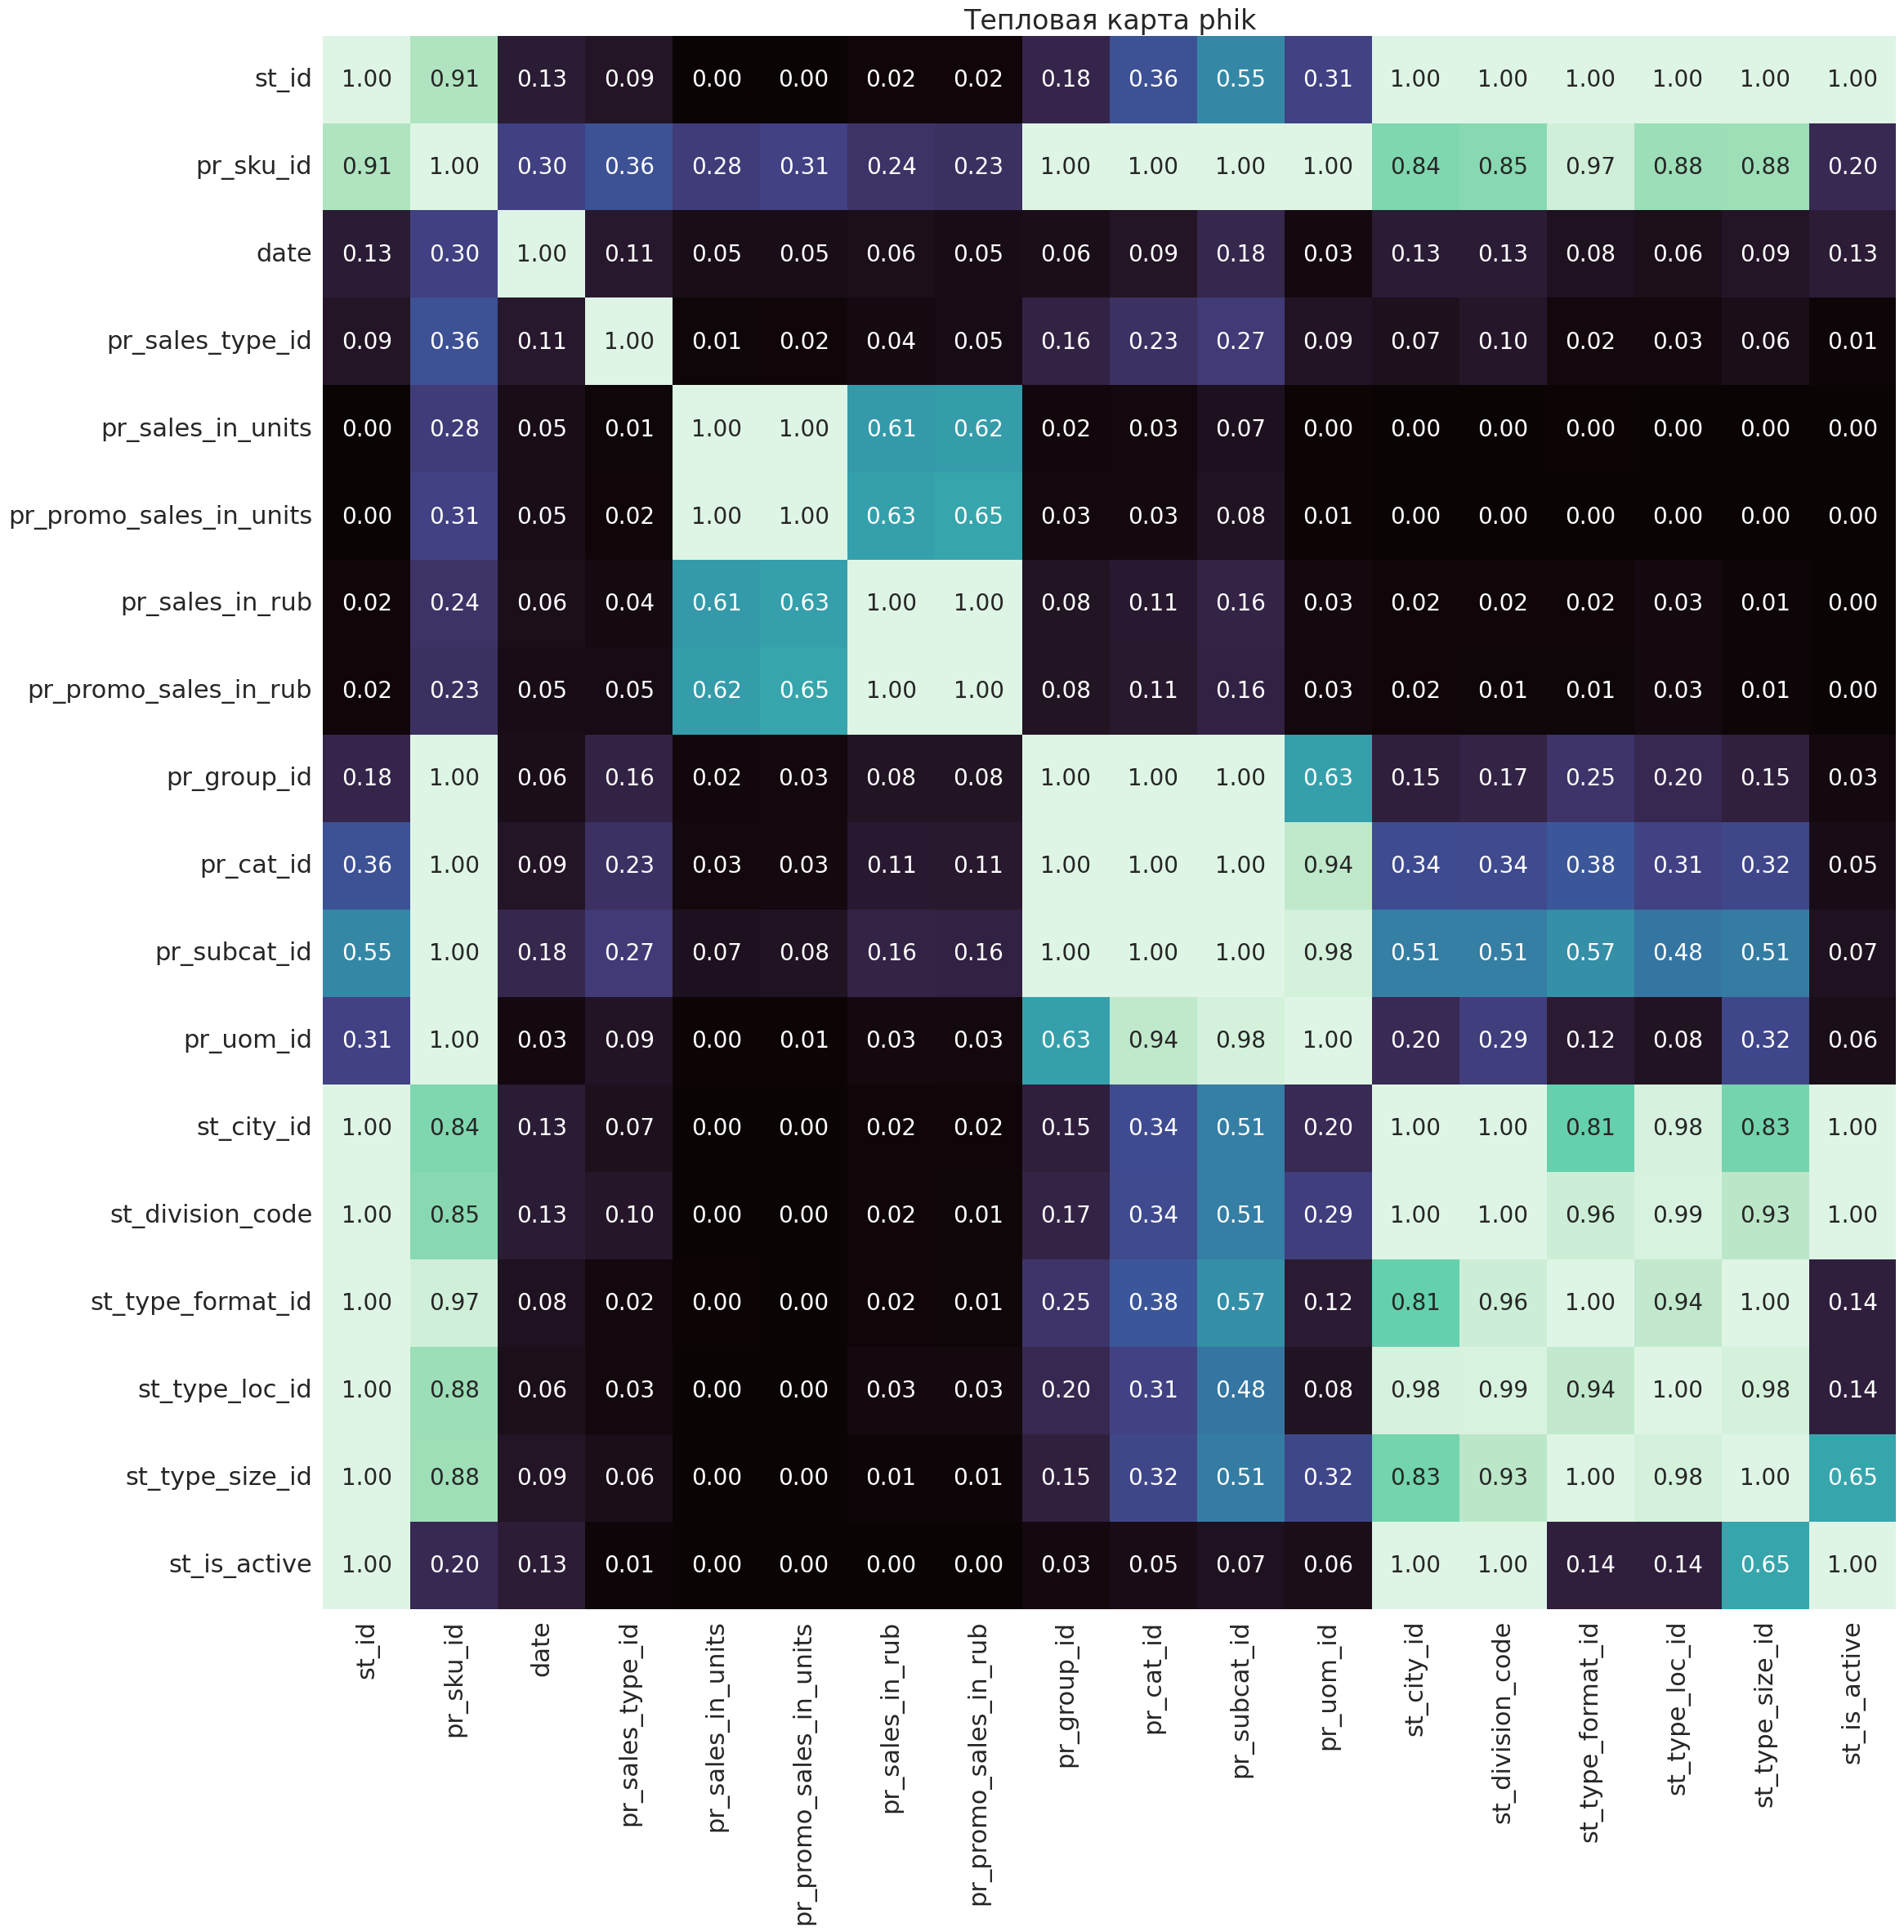

In [ ]:
# Построим хитмэп корреляций phik

plt.figure(figsize = (25,25))

sns.set(font_scale = 2)

sns.heatmap(df.phik_matrix(interval_cols=interval_cols),
            square=True,
            cbar=False,
            annot=True,
            annot_kws={'size':20},
            cmap = 'mako',
            fmt = '.2f')

plt.title('Тепловая карта phik', fontsize = 24)

plt.show()

In [ ]:
# 3. Возвращение хэшей обратно на место порядковых номеров в df
#df_hash_recovered = df_num.copy()
#for column, num_to_hash in num_to_hash_dict.items():
    #df_hash_recovered[column] = df_num[column].map(num_to_hash)

# Генерация признаков

## Праздники

In [ ]:
# Откроем файл с празниками
try:
  holidays = pd.read_csv('holidays_covid_calendar.csv')
except:
  holidays = pd.read_csv('/content/drive/MyDrive/holidays_covid_calendar.csv')



In [ ]:
holidays.head()

,year,day,weekday,date,calday,holiday,covid
0,2015,1,4,01.01.2015,20150101,1,0
1,2015,2,5,02.01.2015,20150102,1,0
2,2015,3,6,03.01.2015,20150103,1,0
3,2015,4,7,04.01.2015,20150104,1,0
4,2015,5,1,05.01.2015,20150105,1,0


In [ ]:
holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   year     3653 non-null   int64 
 1   day      3653 non-null   int64 
 2   weekday  3653 non-null   int64 
 3   date     3653 non-null   object
 4   calday   3653 non-null   int64 
 5   holiday  3653 non-null   int64 
 6   covid    3653 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 199.9+ KB


In [ ]:
 # Изменим тип данных столбца 'date'
holidays['date'] = pd.to_datetime(holidays['date'], infer_datetime_format=True)

<ipython-input-7-daa542d74fe9>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  holidays['date'] = pd.to_datetime(holidays['date'], infer_datetime_format=True)


In [ ]:
holidays.head()

,year,day,weekday,date,calday,holiday,covid
0,2015,1,4,2015-01-01,20150101,1,0
1,2015,2,5,2015-02-01,20150102,1,0
2,2015,3,6,2015-03-01,20150103,1,0
3,2015,4,7,2015-04-01,20150104,1,0
4,2015,5,1,2015-05-01,20150105,1,0


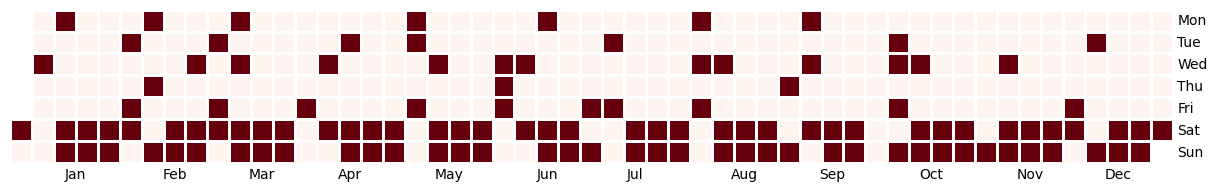

In [ ]:
# Построим тепловую карту-календарь
hol = pd.DataFrame(list(holidays['holiday']), index=holidays['date'])
plt.figure(figsize=(15, 15))
calmap.yearplot(hol, year=2022);

In [ ]:
# Создадим новый датафрейм для генерации признаков
df_c = df.copy()

In [ ]:
# Объединим датафреймы, удалим лишние столбцы
df_c = pd.merge(df_c, holidays, on='date').drop(['year', 'day', 'weekday', 'calday','covid'], axis=1)

In [ ]:
df_c[['date', 'holiday']].sample(15)

,date,holiday
496675,2023-05-31,0
285891,2022-10-05,1
24682,2022-11-14,0
639689,2023-04-24,0
838255,2023-05-14,1
743760,2023-04-14,0
34191,2022-10-18,0
683282,2023-06-28,0
365991,2023-07-03,0
814922,2023-02-21,0


## Цены

In [ ]:
# Найдем средние цены по группам
mean_group_prices = df_c.groupby('pr_group_id')['pr_sales_in_rub'].mean().reset_index()

In [ ]:
mean_group_prices

,pr_group_id,pr_sales_in_rub
0,1ff1de774005f8da13f42943881c655f,436.814382
1,32bb90e8976aab5298d5da10fe66f21d,1481.178221
2,3c59dc048e8850243be8079a5c74d079,151.000000
3,6512bd43d9caa6e02c990b0a82652dca,1414.628474
4,98f13708210194c475687be6106a3b84,258.722433
5,aab3238922bcc25a6f606eb525ffdc56,543.766851
6,c20ad4d76fe97759aa27a0c99bff6710,1137.753483
7,c51ce410c124a10e0db5e4b97fc2af39,1466.101449
8,c74d97b01eae257e44aa9d5bade97baf,258.501051


In [ ]:
# Найдем медианные цены по группам
median_group_prices = df_c.groupby('pr_group_id')['pr_sales_in_rub'].median().reset_index()

In [ ]:
median_group_prices

,pr_group_id,pr_sales_in_rub
0,1ff1de774005f8da13f42943881c655f,237.0
1,32bb90e8976aab5298d5da10fe66f21d,594.0
2,3c59dc048e8850243be8079a5c74d079,74.0
3,6512bd43d9caa6e02c990b0a82652dca,549.0
4,98f13708210194c475687be6106a3b84,159.0
5,aab3238922bcc25a6f606eb525ffdc56,278.0
6,c20ad4d76fe97759aa27a0c99bff6710,549.5
7,c51ce410c124a10e0db5e4b97fc2af39,540.0
8,c74d97b01eae257e44aa9d5bade97baf,130.0


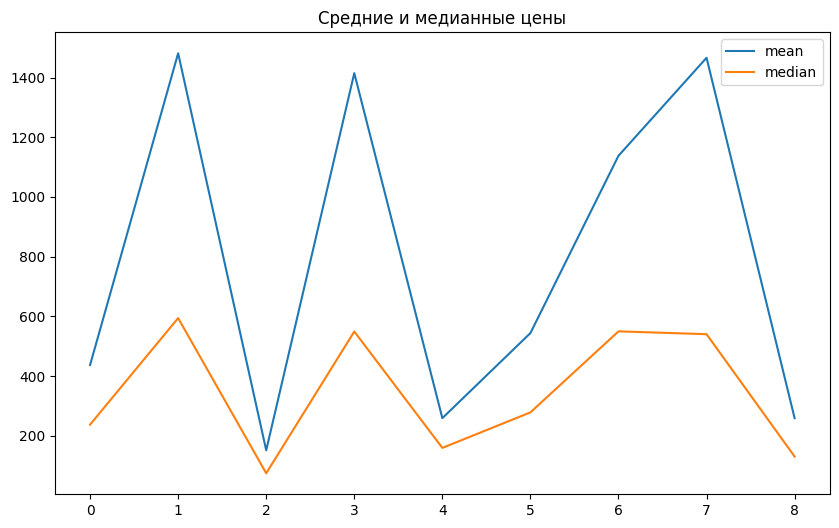

In [ ]:
# Построим графики средних и медианных цен
ax = mean_group_prices['pr_sales_in_rub'].plot(figsize=(10, 6), label='mean', legend=True,  title='Средние и медианные цены')
median_group_prices['pr_sales_in_rub'].plot(label='median', legend=True, ax=ax);

**Средние цены сильно реагируют на выбросы.
Добавим в признаки медианные цены, чтобы модель учла разницу между усредненными и реальными показателями.**

In [ ]:
# Найдем средние цены по товарам
mean_sku_prices = df_c.groupby('pr_sku_id')['pr_sales_in_rub'].mean().reset_index()

In [ ]:
mean_sku_prices

,pr_sku_id,pr_sales_in_rub
0,002c3a40ac50dc870f1ff386f11f5bae,167.000000
1,0045ebdb1069ff4b3dd3efe628c39cd3,136.777778
2,005c52de11abaf8e0a9714b24415ce34,395.400000
3,0063fbd948a3d7368ba9d97739bfe2cc,232.500000
4,00661699f543753ec7e911a64b9fd2f6,427.393913
...,...,...
1986,ff1f1e5d2708809c03d03ff8b689030b,68.193182
1987,ff448e21fa12213374f6b8a58f6df267,189.500000
1988,ff5cb535afe362f766ca6bd5d8e92e88,68.060606
1989,ff62e7bffaca5e0ac8029cd29298c8c3,82.812821


In [ ]:
# Функция для определения медианной цены по группе
def median_group_price(group):
  median = median_group_prices.loc[median_group_prices['pr_group_id'] == group]['pr_sales_in_rub'].iloc[0]
  return median

In [ ]:
# Функция для определения средней цены товара
#def mean_sku_price(sku):
    #mean = mean_sku_prices.loc[mean_sku_prices['pr_sku_id'] == sku, 'pr_sales_in_rub'][0]
    #return mean

In [ ]:
# Создаем столбцы с ценами
df_c['price'] = df_c['pr_sales_in_rub']/df_c['pr_sales_in_units'] # цена товара в конкретный день в конкретном магазине
#df_c['sku_price_mean'] = df_c['pr_sku_id'].apply(mean_sku_price) # средняя цена товара
df_c['group_price_median'] = df_c['pr_group_id'].apply(median_group_price) # медианная цена группы товаров

In [ ]:
df_c[['pr_sales_in_units',
     'pr_sales_in_rub',
     'price',
     'group_price_median']].head(10)

,pr_sales_in_units,pr_sales_in_rub,price,group_price_median
0,5.0,825.0,165.000000,278.0
1,18.0,3202.0,177.888889,278.0
2,4.0,349.0,87.250000,130.0
3,3.0,221.0,73.666667,130.0
4,37.0,255.0,6.891892,130.0
5,0.0,127.0,inf,278.0
6,0.0,56.0,inf,278.0
7,4.0,720.0,180.000000,278.0
8,1.0,47.0,47.000000,130.0
9,5.0,299.0,59.800000,130.0


## Скользящие среднние

In [ ]:
# Добавим скользящие средние
df_c['rolling_mean_14'] = df_c['pr_sales_in_units'].shift().rolling(14).mean()
df_c['rolling_mean_21'] = df_c['pr_sales_in_units'].shift().rolling(21).mean()
df_c['rolling_mean_30'] = df_c['pr_sales_in_units'].shift().rolling(30).mean()

In [ ]:
df_c[['pr_sales_in_units',
      'rolling_mean_14',
      'rolling_mean_21',
      'rolling_mean_30']].head(35)

,pr_sales_in_units,rolling_mean_14,rolling_mean_21,rolling_mean_30
0,5.0,NaN,NaN,NaN
1,18.0,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN
3,3.0,NaN,NaN,NaN
4,37.0,NaN,NaN,NaN
5,0.0,NaN,NaN,NaN
6,0.0,NaN,NaN,NaN
7,4.0,NaN,NaN,NaN
8,1.0,NaN,NaN,NaN
9,5.0,NaN,NaN,NaN


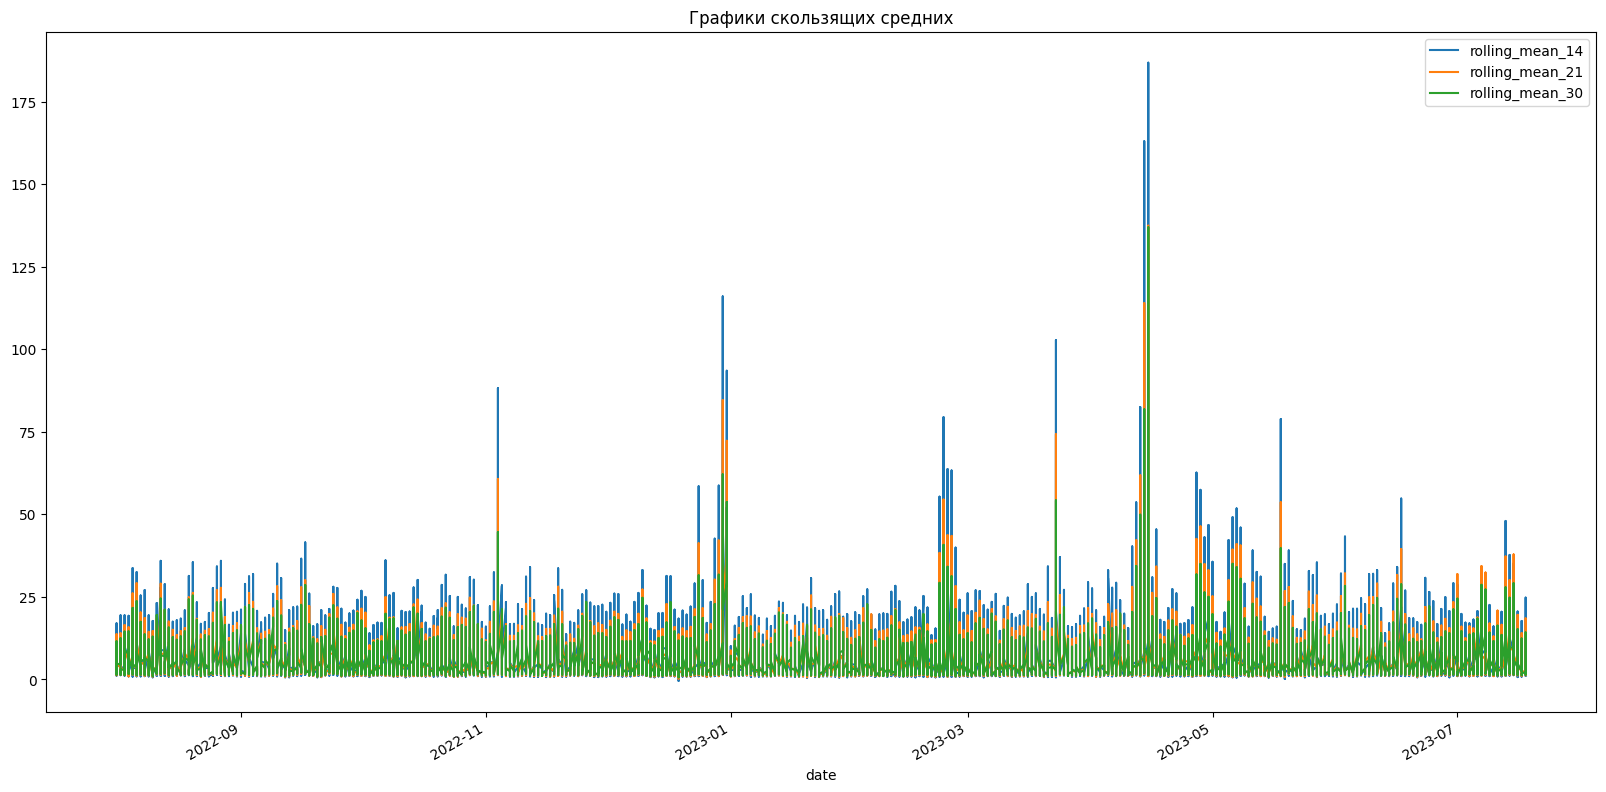

In [ ]:
# Построим графики скользящих средних
df_c[['date',
      'rolling_mean_14',
      'rolling_mean_21',
      'rolling_mean_30']].plot(x='date', figsize=(20,10), title='Графики скользящих средних');

In [ ]:
df_c = df_c.sort_values('date', ascending=False)

df_c['pr_sales_in_units_lag'] = df_c.groupby('pr_cat_id')['pr_sales_in_units'].shift(7)
df_c['pr_sales_in_rub_lag'] = df_c.groupby('pr_cat_id')['pr_sales_in_rub'].shift(7)

df_c['pr_sales_in_units_max_lag'] = df_c.groupby('pr_cat_id')['pr_sales_in_units'].transform(lambda x: x.rolling(window=7).max())
df_c['pr_sales_in_units_min_lag'] = df_c.groupby('pr_cat_id')['pr_sales_in_units'].transform(lambda x: x.rolling(window=7).min())
df_c['pr_sales_in_rub_max_lag'] = df_c.groupby('pr_cat_id')['pr_sales_in_rub'].transform(lambda x: x.rolling(window=7).max())
df_c['pr_sales_in_rub_min_lag'] = df_c.groupby('pr_cat_id')['pr_sales_in_rub'].transform(lambda x: x.rolling(window=7).min())

# Вычисление среднего значения продаж за последние 7 дней и 14 дней для каждой группы,
# а также разницы между средними значениями продаж за последние 7 и 14 дне
df_c['mean sales_week_lag'] = df_c.groupby(['pr_cat_id', 'pr_sku_id'])['pr_sales_in_units'].transform(lambda x: x.rolling(window=7).mean())
df_c['mean sales_two_week_lag'] = df_c.groupby(['pr_cat_id', 'pr_sku_id'])['pr_sales_in_units'].transform(lambda x: x.rolling(window=14).mean())
df_c['lag_feature_diff'] = df_c['mean sales_two_week_lag'] - df_c['mean sales_week_lag']

# Создание нового столбца для лагового признака дня недели
df_c['lag_feature_weekday'] = df_c['date'].dt.weekday.shift(1)

# Создание нового столбца для лагового признака продаж за 4 недели
df_c['lag_feature_4weeks'] = df_c['pr_sales_in_units'].rolling(window=28).sum()

# Создание нового столбца для лагового признака продаж за последнюю неделю
df_c['lag_feature_1week'] = df_c['pr_sales_in_units'].rolling(window=7).sum()

# Расчет отношения продаж за 4 недели к продажам за последнюю неделю
df_c['sales_ratio'] = df_c['lag_feature_4weeks'] / df_c['lag_feature_1week']

# Расчет отношения продаж товара к продажам во всей категории
df_c['sales_ratio_cat'] = df_c['pr_sales_in_units'] / df_c.groupby('pr_cat_id')['pr_sales_in_units'].transform('sum')

# Обучение модели

In [ ]:
# Разделим данные на выборки
train, test = train_test_split(df_c, shuffle=False, test_size=0.1)
train = train.dropna()

In [ ]:
train.shape

(772167, 38)

In [ ]:
test.shape

(88302, 38)

In [ ]:
print(train['date'].min(), train['date'].max())
print(test['date'].min(), test['date'].max())

2022-09-06 00:00:00 2023-07-17 00:00:00
2022-08-01 00:00:00 2022-09-06 00:00:00


In [ ]:
# Выделим признаки и целевой признак
features_train = train.drop(['pr_sales_in_units', 'pr_sales_in_rub', 'pr_promo_sales_in_units'], axis = 1)
target_train =  train['pr_sales_in_units']

features_test = test.drop('pr_sales_in_units', axis = 1)
target_test = test['pr_sales_in_units']

In [ ]:
# Зададим random state
RANDOM_STATE = 11

In [ ]:
# Зададим категориальные признаки
cat_features = ['st_id',
                'pr_sku_id',
                'pr_sales_type_id',
                'pr_group_id',
                'pr_cat_id',
                'pr_subcat_id',
                'pr_uom_id',
                'st_city_id',
                'st_division_code',
                'st_type_format_id',
                'st_type_loc_id',
                'st_type_size_id',
                'st_is_active']

In [ ]:
# Напишем фукцию для подсчета WAPE
def wape(t, p):
    return np.sum(np.abs(t-p))/np.sum(np.abs(t))

In [ ]:
# Создадим метрику на основе функции wape с помощью make_scorer
wape_score = make_scorer(wape, greater_is_better = False)

In [ ]:
# Создадим кастомную метрику для CatBoostRegressor

class WapeMetric(object):
  def get_final_error(self, error, weight):
    return error

  def is_max_optimal(self):
    return False

  def evaluate(self, approxes, target, weight):
    assert len(approxes) == 1
    assert len(target) == len(approxes[0])

    approx = approxes[0]

    e = np.abs(target-approx)
    t_sum = np.sum(np.abs(target))
    e_sum = np.sum(e)
    error = e_sum/t_sum

    return error, 1

In [ ]:
# Обучим CatBoostRegressor с гиперпараметрами по умолчанию

pool = Pool(data=features_train, label=target_train, cat_features=cat_features)

cb = CatBoostRegressor(eval_metric=WapeMetric(),
                       early_stopping_rounds=200,
                       verbose = False,
                       random_seed=RANDOM_STATE)

tscv = TimeSeriesSplit()

grid = {}

rs_result = cb.grid_search(grid, pool, cv=tscv, plot = True, refit=True, verbose=False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.06720082453
bestIteration = 999

Training on fold [0/5]

bestTest = 0.09068613998
bestIteration = 999

Training on fold [1/5]

bestTest = 0.0831349423
bestIteration = 999

Training on fold [2/5]

bestTest = 0.09610985032
bestIteration = 999

Training on fold [3/5]

bestTest = 0.06954937308
bestIteration = 999

Training on fold [4/5]

bestTest = 0.06558436459
bestIteration = 999



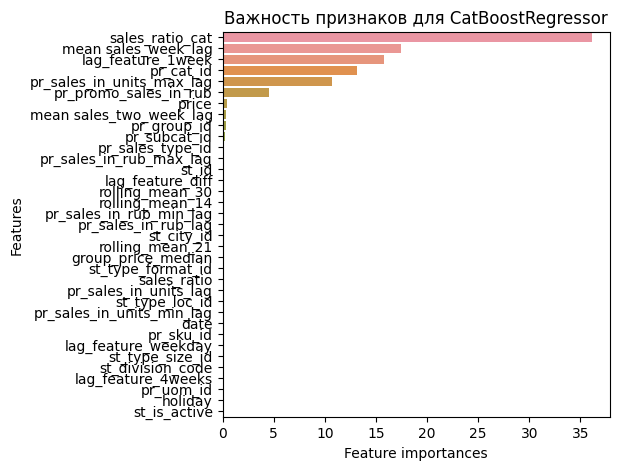

In [ ]:
# Посмотрим на важность признаков для CatBoostRegressor

cb_feat_imp = cb.get_feature_importance(prettified=True)

plt.subplots(figsize=(5, 5))
ax = sns.barplot(x=cb_feat_imp['Importances'], y=cb_feat_imp['Feature Id'])
ax.set_title('Важность признаков для CatBoostRegressor')
ax.set_yticklabels(cb_feat_imp['Feature Id'])
ax.set_xlabel('Feature importances')
ax.set_ylabel('Features')
plt.show()

In [ ]:
# Отбросим неважные признаки и оставим 6 самых важных

features_train_imp = features_train.drop(['',], axis=1)

In [ ]:
# Инициализируем модель CatBoostRegressor с перебором гиперпараметров с помощью функции grid_search

%time

pool = Pool(data=features_train, label=target_train, cat_features=cat_features)

cb = CatBoostRegressor(eval_metric=WapeMetric(),
                       early_stopping_rounds=200,
                       random_seed=RANDOM_STATE)

grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'iterations': [1000, 1500]}

rs_result = cb.grid_search(grid, pool, cv=tscv, plot = True, refit=True, verbose=False)

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 9.06 µs


KeyboardInterrupt: ignored

Переобучим лучшую модель только на важных признаках.

In [ ]:
features_train_imp.info()

In [ ]:
cat_features_imp = ['',]

## Целевое кодирование

**Метод целевого кодирования (Target Encoding, также называют Mean Encoding) предназначен для кодирования категориальных признаков в числа. В отличие от других методов, таких как One-Hot Encoding, он использует целевой признак для создания кодировки.**

**Целевое кодирование заменяет каждую категорию средним значением целевого признака, имеющего эту категорию. Схема кодирования "смешивает" глобальное целевое среднее с целевым средним, зависящим от значения категории. Степень смешивания определяет параметр smooth. Более высокое его значение придаст больший вес глобальному целевому среднему. По умолчанию smooth="auto", где для сглаживания устанавливается эмпирическая оценка Байеса.**



In [ ]:
#mean_targ_enc = TargetEncoder(target_type="continuous")
#df_c['group_transf'] = mean_targ_enc.fit_transform(pd.DataFrame(df_c['pr_group_id'], index=df_c.index), df_c['pr_sales_in_units'])

In [ ]:
#df_c[['pr_group_id', 'group_transf']]

,pr_group_id,group_transf
0,aab3238922bcc25a6f606eb525ffdc56,3.305703
1,aab3238922bcc25a6f606eb525ffdc56,3.307304
2,c74d97b01eae257e44aa9d5bade97baf,5.037226
3,c74d97b01eae257e44aa9d5bade97baf,5.010348
4,c74d97b01eae257e44aa9d5bade97baf,5.051024
...,...,...
883010,c74d97b01eae257e44aa9d5bade97baf,5.051024
883011,c74d97b01eae257e44aa9d5bade97baf,5.010348
883012,c74d97b01eae257e44aa9d5bade97baf,5.010348
883013,c74d97b01eae257e44aa9d5bade97baf,5.015682
